<h1 style="text-align:center;">UNIVERSIDAD DE LAS AMÉRICAS</h1>

<h3 style="text-align:center;">Programa de Posgrado / Inteligencia de Negocios y Ciencia de Datos</h3>

<h5 style=""><strong>Estudiante:</strong> Selena Pozo Barahona</h5>

##### Diccionario de Variables
La base con la que trabajaremos este caso  práctico contiene información sobre datos históricos de las ventas de Wallmart desde 2010-02-05 hasta 2012-11-01, en el archivo WalmartStoresales. Dentro de este archivo encontrará los siguientes campos:  

__Tienda:__ el número de la tienda.  
__Fecha:__ la semana de ventas.  
__Weekly_Sales:__ ventas para la tienda dada.  
__Holiday_Flag:__ si la semana es una semana especial de vacaciones 1 – Semana de vacaciones 0 – Semana no festiva.  
__Temperatura:__ Temperatura el día de la venta.  
__Fuel_price:__ costo del combustible en la región.   
__IPC:__ índice de precios al consumidor vigente.  
__Desempleo:__ tasa de desempleo predominante.  
__Eventos festivos.__  
__Super bowl:__ 12 de febrero de 2010, 11 de febrero de 2011, 10 de febrero de 2012, 8 de febrero de 2013\  
__Día del Trabajo:__ 10-sep-10, 9-sep-11, 7-sep-12, 6-sep-13\  
__Acción de Gracias:__ 26-nov-10, 25-nov-11, 23-nov-12, 29-nov-13\  
__Navidad:__ 31-dic-10, 30-dic-11, 28-dic-12, 27-dic-13  

#### __PARTE 1:__

##### __1: Importe la base de datos a una base en Jupyter Notebook con pandas.__ 

In [1]:
# Importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importamos nuestra BDD.
df=pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


##### __2: Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención?__

In [3]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Según la descripción de variables dentro del dataframe, se obtiene que, las variables numéricas son Weekly sales, Temperature, Fuel price, CPI y Unemploymet. A simple vista se puede notar que los valores de Weekly_Sales están en notación científica y una opción podría ser minimizarla.

##### __3: Evalúe si la base contiene datos perdidos.__

In [5]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

La base de datos no contiene datos perdidos en ninguna de sus columnas. 

##### __4: Evalúe si alguna de las variables contiene datos atípicos (outliers) De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir.__

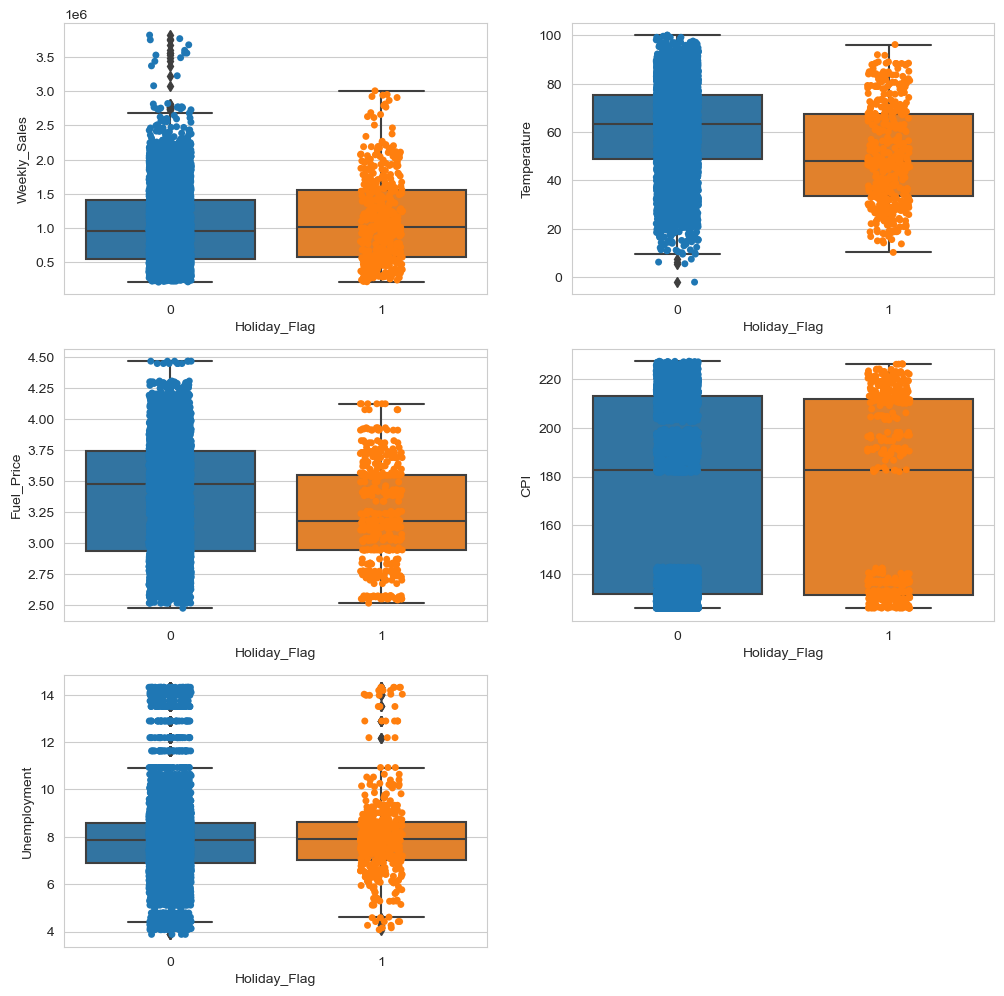

In [6]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
plt.subplot(3,2,1)
ax= sns.boxplot(x='Holiday_Flag',y='Weekly_Sales',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='Weekly_Sales',data=df)
plt.subplot(3,2,2)
ax= sns.boxplot(x='Holiday_Flag',y='Temperature',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='Temperature',data=df)
plt.subplot(3,2,3)
ax= sns.boxplot(x='Holiday_Flag',y='Fuel_Price',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='Fuel_Price',data=df)
plt.subplot(3,2,4)
ax= sns.boxplot(x='Holiday_Flag',y='CPI',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='CPI',data=df)
plt.subplot(3,2,5)
ax= sns.boxplot(x='Holiday_Flag',y='Unemployment',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='Unemployment',data=df)

De acuerdo a lo observado en los diagramas de cajas, se puede identificar datos atípicos en tres variables. Los datos que se encuentran fuera de los cuartiles en los diagramas de cajas. Estos valores son considerados atípicos porque se alejan significativamente de la mayoría de los datos en el conjunto y, por lo tanto, pueden indicar la presencia de variabilidad extrema o errores en la medición. Estas variables son: Weekly Sales, Temperature y Unemployment.

__Nota:__ Para que nuestras variables sean aceptables para nuestro modelo, debemos eliminar nuestros valores atípicos. Para ello vamos a utilizar el método de rango intercuartílico.

<h5 style=""><strong>Eliminación de valores atípicos para Weekly_Sales.</strong></h5>

In [7]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar
Q1 = df.Weekly_Sales.quantile(0.25)
Q3 = df.Weekly_Sales.quantile(0.75)
IQR = Q3 - Q1 #rango intercuartil
print(IQR)

866808.5549999999


In [8]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango:
df = df[~((df['Weekly_Sales'] < (Q1 - 1.5 * IQR)) |(df['Weekly_Sales'] > (Q3 + 1.5 * IQR)))]
df.shape

(6401, 8)

In [ ]:
<h5 style=""><strong>Eliminación de valores atípicos para Temperature.</strong></h5>

In [9]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar
Q1 = df.Temperature.quantile(0.25)
Q3 = df.Temperature.quantile(0.75)
IQR = Q3 - Q1 #rango intercuartil
print(IQR)

27.340000000000003


In [10]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango:
df = df[~((df['Temperature'] < (Q1 - 1.5 * IQR)) |(df['Temperature'] > (Q3 + 1.5 * IQR)))]
df.shape

(6398, 8)

In [ ]:
<h5 style=""><strong>Eliminación de valores atípicos para Unemployment.</strong></h5>

In [11]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar
Q1 = df.Unemployment.quantile(0.25)
Q3 = df.Unemployment.quantile(0.75)
IQR = Q3 - Q1 #rango intercuartil
print(IQR)

1.7309999999999999


In [12]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango:
df = df[~((df['Unemployment'] < (Q1 - 1.5 * IQR)) |(df['Unemployment'] > (Q3 + 1.5 * IQR)))]
df.shape

(5917, 8)

In [ ]:
<h4 style=""><strong>Ahora vamos a verificar la eliminación de los datos atípicos.</strong></h4>

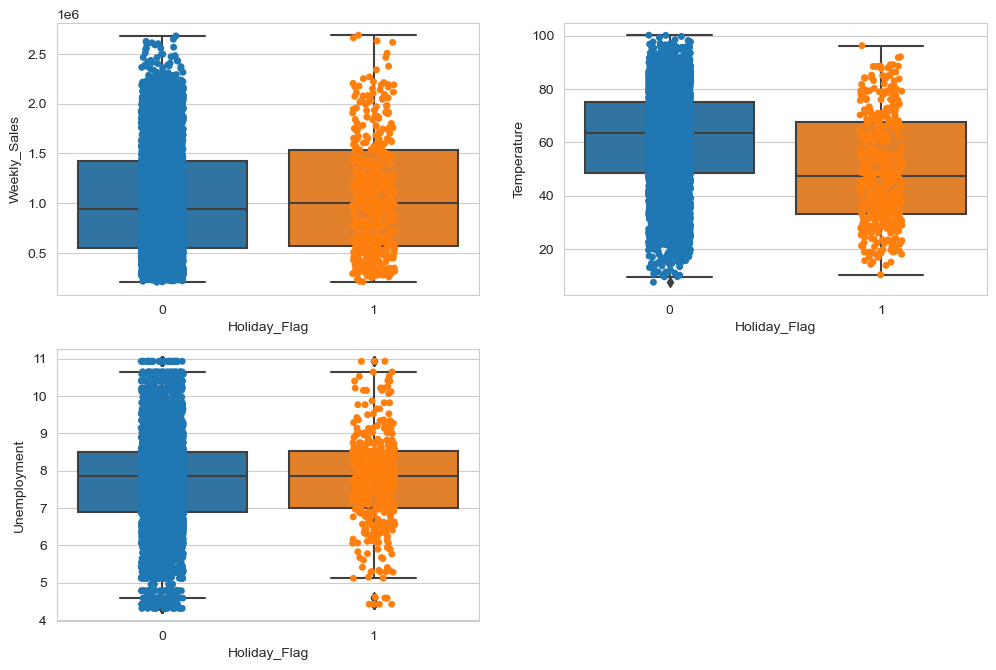

In [13]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
plt.subplot(3,2,1)
ax= sns.boxplot(x='Holiday_Flag',y='Weekly_Sales',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='Weekly_Sales',data=df)
plt.subplot(3,2,2)
ax= sns.boxplot(x='Holiday_Flag',y='Temperature',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='Temperature',data=df)
plt.subplot(3,2,3)
ax= sns.boxplot(x='Holiday_Flag',y='Unemployment',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='Unemployment',data=df)

Ahora si, después de haber realizado el proceso de eliminación de los outliers, las variables son más aceptables para el modelo.

##### __5: Grafique las distribuciones de las variables y a priori comente sobre ellas.__

Text(0.5, 1.0, 'Unemployment')

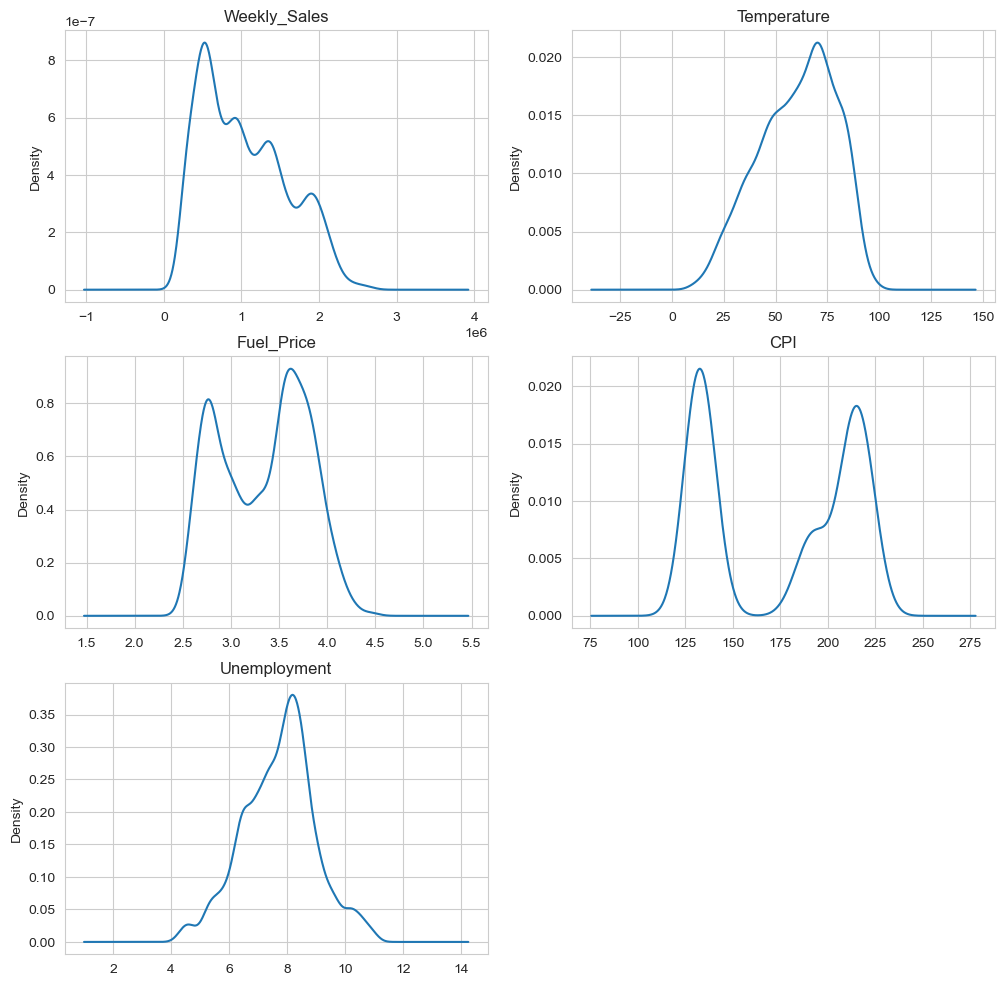

In [23]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')

# Variable Weekly_Sales
plt.subplot(3,2,1)
df['Weekly_Sales'].plot.density()
plt.title("Weekly_Sales")

# Variable Temperature
plt.subplot(3,2,2)
df['Temperature'].plot.density()
plt.title("Temperature")

# Variable Fuel_Price
plt.subplot(3,2,3)
df['Fuel_Price'].plot.density()
plt.title("Fuel_Price")

# Variable CPI
plt.subplot(3,2,4)
df['CPI'].plot.density()
plt.title("CPI")

# Variable Unemployment
plt.subplot(3,2,5)
df['Unemployment'].plot.density()
plt.title("Unemployment")

In [24]:
print("Sesgo de Weekly_Sales:", df['Weekly_Sales'].skew())
print("Sesgo de Temperature:", df['Temperature'].skew())
print("Sesgo de Fuel_Price:", df['Fuel_Price'].skew())
print("Sesgo de CPI:", df['CPI'].skew())
print("Sesgo de Unemployment:", df['Unemployment'].skew())

Sesgo de Weekly_Sales: 0.5031092228744799
Sesgo de Temperature: -0.35154869769214975
Sesgo de Fuel_Price: -0.0871283312387149
Sesgo de CPI: -0.09204138603781147
Sesgo de Unemployment: -0.0993326871740596


A nivel gráfico se puede observar que la variable "Weekly_Sales" tiene un sesgo un poquito más pronunciado a la izquierda. Sin embargo, las variables numéricas identifican datos bastantes simétricos, a excepción de "Weekly_Sales" que llega a tener un sesgo de 0.503 por su sesgo, pero que de todas maneras se considera como un rango simétrico.

##### __6: Obtenga las correlaciones entre los datos de corte numérico.__

In [25]:
# Correlación de datos de Corte Numérico
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.319354,0.004289,-0.027045,0.047519,-0.208637,0.309645
Weekly_Sales,-0.319354,1.000000,0.024390,-0.041686,0.019664,-0.082977,-0.073092
Holiday_Flag,0.004289,0.024390,1.000000,-0.157220,-0.076529,-0.000450,0.011031
Temperature,-0.027045,-0.041686,-0.157220,1.000000,0.145157,0.217847,0.024204
Fuel_Price,0.047519,0.019664,-0.076529,0.145157,1.000000,-0.144515,-0.105214
CPI,-0.208637,-0.082977,-0.000450,0.217847,-0.144515,1.000000,-0.219020
Unemployment,0.309645,-0.073092,0.011031,0.024204,-0.105214,-0.219020,1.000000


##### __7: Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.__

Para este análisis, vamo a usar como varable dependiente el CPI, que indica el índice de precios al consumidor vigente.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# Recodificamos las variables categóricas con Label Encoder
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas =df.select_dtypes('object').columns

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
labelencoder = LabelEncoder()

In [30]:
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

Separamos a los predictores de nuestra variable objetivo:

In [31]:
X = df[df.columns.difference(['CPI'])]
y = df.CPI

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20,random_state =123)

In [34]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(4733, 7)  <class 'pandas.core.frame.DataFrame'>
(4733,) 	  <class 'pandas.core.series.Series'>
(1184, 7)  <class 'pandas.core.frame.DataFrame'>
(1184,) 	  <class 'pandas.core.series.Series'>


##### __8: Indique que tipo de modelación realizarán y porqué.__

Para este caso vamos a utilizar el modelo de regresión lineal de Sklearn, este modelo nos permite predecir una variable numérica continua (variable dependiente), que en este análisis es el CPI,  en función de una o más variables predictoras (variables independientes). Esto porque queremos predecir los precios a los que puede acceder un consumidor vigente en estas tiendas.

##### __10: Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.__

<h5 style="text-align:center"><strong>Modelo de Regresión Lineal por Sklearn.</strong></h5>

In [35]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [36]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

<h5 style="text-align:center"><strong>Métricas de Evaluación.</strong></h5>

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

<h5 style=""><strong>MSE</strong></h5>

In [38]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

1266.3584670646126
1235.6093929511119


<h5 style=""><strong>RMSE</strong></h5>

In [39]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

35.58593074607734
35.15123600886763


<h5 style=""><strong>MAE</strong></h5>

In [40]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

32.44054870241551
32.0340140783798


<h5 style=""><strong>R^2</strong></h5>

In [41]:
from sklearn.metrics import r2_score

In [42]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.16838405872318607
El R^2 del subconjunto de prueba es: 0.18378264338170835


In [43]:
# Print the Intercept:
print('Intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('Pendiente:', modelo_regresion.coef_) 

Intercepto: 268.43282885892665
Pendiente: [-6.70269010e-03 -1.60271990e+01  4.21004587e+00 -5.37507561e-01
  4.95019006e-01 -6.17167041e+00 -9.85268653e-06]


##### 11: Grafique a los valores predicho de modelo vs los valores reales. ¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta.

<h5 style="text-align:center"><strong>Predicciones es el subgrupo de datos de entrenamiento.</strong></h5>

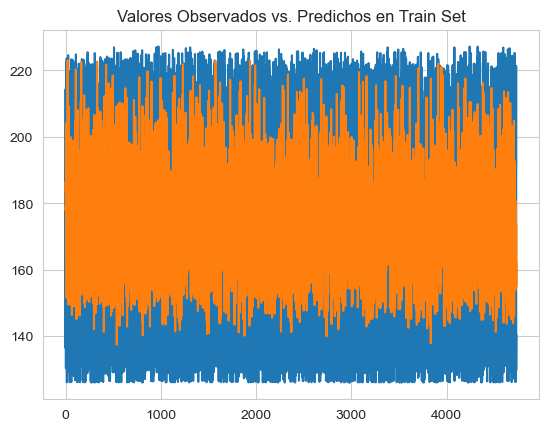

In [44]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores Observados vs. Predichos en Train Set");

In [ ]:
<h5 style="text-align:center"><strong>Predicciones es el subgrupo de datos de prueba.</strong></h5>

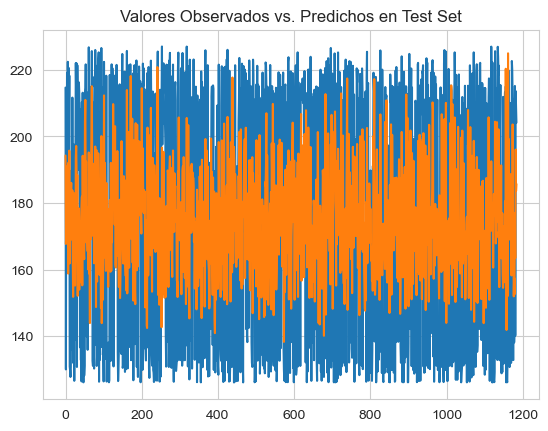

In [45]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores Observados vs. Predichos en Test Set");

##### __12: Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo.__

<h5 style=""><strong>Bonus: Feature importance.</strong></h5>

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()

In [48]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

<h5 style=""><strong>Entrenar el modelo con los datos de entrenamiento.</strong></h5>

In [49]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

<h5 style=""><strong>Realizar las Predicciones.</strong></h5>

In [50]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

<h5 style=""><strong>R^2</strong></h5>

In [51]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std)
print('El R^2 del subconjunto de prueba es:' , r_square_test_std)

El R^2 del subconjunto de entrenamiento es: 0.16838405872318607
El R^2 del subconjunto de prueba es: 0.183782643382305


<h5 style=""><strong>Predicciones es el subgrupo de datos de entrenamiento.</strong></h5>

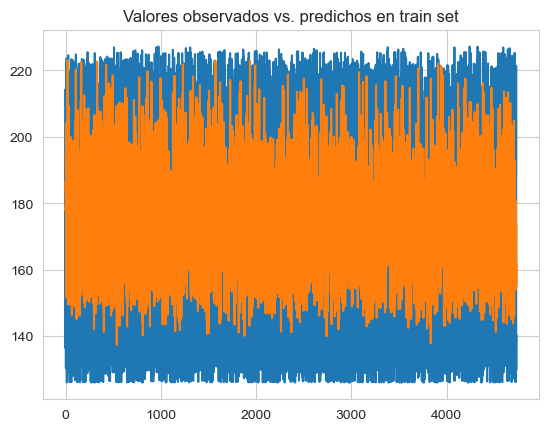

In [52]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

<h5 style=""><strong>Predicciones es el subgrupo de datos de prueba.</strong></h5>

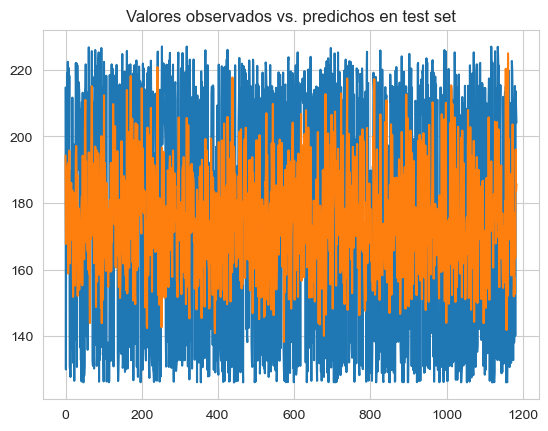

In [53]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

<h5 style=""><strong>Extraer los Coeficientes.</strong></h5>

In [54]:
importancia = modelo_regresion_std.coef_

In [55]:
# Resumen
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: -0.27689
Variable explicativa No. 1, Score: -7.32771
Variable explicativa No. 2, Score: 1.07071
Variable explicativa No. 3, Score: -7.01887
Variable explicativa No. 4, Score: 9.08358
Variable explicativa No. 5, Score: -7.72150
Variable explicativa No. 6, Score: -5.43728


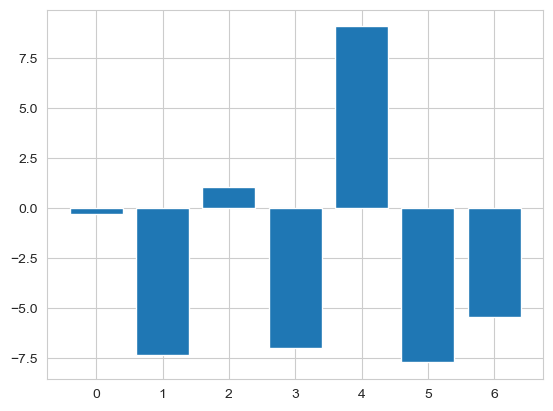

In [56]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

Según nuestro análisis "feature importance", las variables más significativas para predecir nuestro modelo, son la variable "Holiday_Flag" y "Flue_Price".

##### __13: Suba su proyecto final en su cuenta de Github y adjunte una captura de pantalla en esta plataforma.__